
### Develop a ML model to predict diabetes using the Decision Tree Classifier.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("D:/ML Dataset/diabetes.csv")
dataset

print(dataset.columns) #print all the column names 

print("Dataset Shape : ", dataset.shape)

# Shape: 150 samples (rows) and 4 features (columns.)
#Printing the dataset observations

dataset.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Dataset Shape :  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:

# Splitting the dataset into trian and test

# Split the datasets into two part Testing (test_size = 30%) and Training data (70%)

X_train, X_test, y_train, y_test = train_test_split(dataset.drop((["Outcome"]),axis=1), dataset[["Outcome"]], test_size = 0.3 , random_state = 1)


In [5]:
# Here we defined the decisioin tree classifieer (Basically building a model).
# And then fit the training data into the classifier to train the model.
# Note that we fit both X_train, and y_train (Basically features and target)
# means model will learn features values to predict the category of flower.

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)

#performancec training

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [6]:
y_pred2 = clf_entropy.predict(X_test)
print("Predicted values : ")
print(y_pred2)

Predicted values : 
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0]


In [7]:
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred2))

print("Accuracy : ", accuracy_score(y_test,y_pred2)*100, "%")

print("Report : \n ", classification_report(y_test, y_pred2))

# In Confusion Matrix 
# values in the diagonal are correct values i.e. True Positive like (14,17,12)
# values other than diagonal are incorrect values i.e. True Negative or False Positive like (1 in 2nd & 3rd row)

Confusion Matrix : 
 [[121  25]
 [ 29  56]]
Accuracy :  76.62337662337663 %
Report : 
                precision    recall  f1-score   support

           0       0.81      0.83      0.82       146
           1       0.69      0.66      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.76      0.77      0.76       231



In [8]:
# Prediction on random data using clf_entropy

Xrandom = [[6.4, 1.8, 6.6, 2.1,3,4,5,4]]

y_pred4 = clf_entropy.predict(Xrandom)

print(y_pred4)


[0]


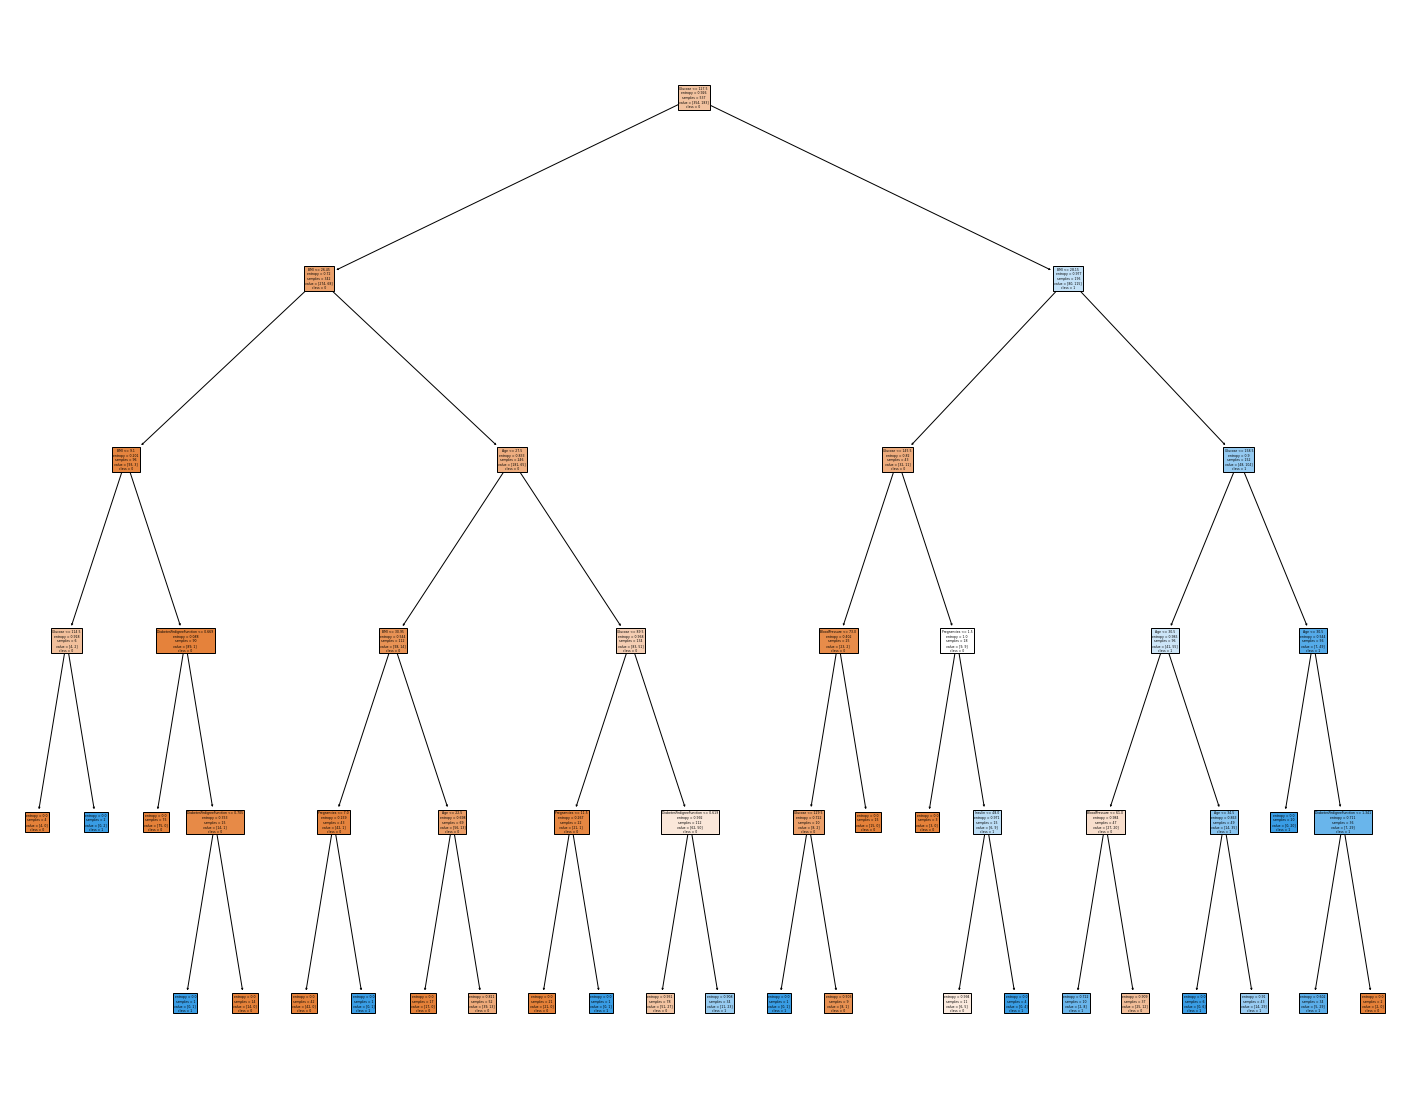

In [9]:
fig = plt.figure(figsize = (25,20))

a = tree.plot_tree(clf_entropy, feature_names = X_train.columns, class_names = ["0","1"], filled = True)

#### Bagging

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 5)

tree = tree.fit(X_train, y_train)

bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, random_state = 5)
bag = bag.fit(X_train, y_train)

y_train_pred = bag.predict(X_train)

y_test_pred = bag.predict(X_test)

In [11]:
bag_test = round(accuracy_score(y_test, y_test_pred),2) * 100
print(bag_test, '%')

78.0 %


In [ ]:
# Accuracy : 78%